In [49]:
from pynq import Overlay
import numpy as np
import pandas as pd
ol = Overlay("lenet_full.bit")
ol.ip_dict
 

{'dense_0': {'type': 'ayush:cnn:dense:1.0',
  'mem_id': 's_axi_control',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_S_AXI_CONTROL_ADDR_WIDTH': '6',
   'C_S_AXI_CONTROL_DATA_WIDTH': '32',
   'C_M_AXI_GMEM_ID_WIDTH': '1',
   'C_M_AXI_GMEM_ADDR_WIDTH': '64',
   'C_M_AXI_GMEM_DATA_WIDTH': '32',
   'C_M_AXI_GMEM_AWUSER_WIDTH': '1',
   'C_M_AXI_GMEM_ARUSER_WIDTH': '1',
   'C_M_AXI_GMEM_WUSER_WIDTH': '1',
   'C_M_AXI_GMEM_RUSER_WIDTH': '1',
   'C_M_AXI_GMEM_BUSER_WIDTH': '1',
   'C_M_AXI_GMEM_USER_VALUE': '0x00000000',
   'C_M_AXI_GMEM_PROT_VALUE': '"000"',
   'C_M_AXI_GMEM_CACHE_VALUE': '"0011"',
   'C_M_AXI_GMEM_ENABLE_ID_PORTS': 'true',
   'C_M_AXI_GMEM_ENABLE_USER_PORTS': 'false',
   'Component_Name': 'design_1_dense_0_0',
   'clk_period': '10',
   'machine': '64',
   'combinational': '0',
   'latency': '250306',
   'II': 'x',
   'EDK_IPTYPE': 'PERIPHERAL',
   'C_S_AXI_CONTROL_BASEADDR': '0x40000000',
   'C_S_AXI_CONTROL_HIGHADDR': '0x4000FFFF',
   'ADD

In [50]:
dense_ip = ol.dense_0
mmio1 = dense_ip.mmio
conv1_ip =ol.conv1_0
mmio2 = conv1_ip.mmio 
conv2_ip = ol.conv2_0
mmio1 = conv2_ip.mmio

In [51]:
dense_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  inputs_1 = Register(inputs=write-only),
  inputs_2 = Register(inputs=write-only),
  final_1 = Register(final=write-only),
  final_2 = Register(final=write-only)
}

In [52]:
conv1_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  final_buffer_1 = Register(final_buffer=write-only),
  final_buffer_2 = Register(final_buffer=write-only)
}

In [53]:
conv2_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  final_buffer_1 = Register(final_buffer=write-only),
  final_buffer_2 = Register(final_buffer=write-only)
}

# Neural Network Architecture

This notebook outlines a simple feedforward neural network architecture consisting of two convolutional layers followed by a dense (fully connected) layer.

## Network Structure

1. **Convolutional Layer 1 (Conv1)**
   - Input Shape: (784,)
   - Output Shape: (864,)

2. **Convolutional Layer 2 (Conv2)**
   - Input Shape: (864,)
   - Output Shape: (256,)

3. **Dense Layer**
   - Input Shape: (256,)
   - Output Shape: (10,)

## Diagram

```plaintext
[ Input (784) ] 
        |
    [ Conv1 (864) ]
        |
    [ Conv2 (256) ]
        |
    [ Dense (10) ]


In [106]:
from pynq import allocate
import numpy as np 
 
a = allocate(shape=(784,), dtype=np.float32)   #input1
b = allocate(shape=(864,), dtype=np.float32)   #output_1 

c = allocate(shape=(864,), dtype=np.float32)   #input_2 
d = allocate(shape=(256,), dtype=np.float32)   #output_2 
 
e = allocate(shape=(256,), dtype=np.float32)   #input_3 
f = allocate(shape=(10,), dtype=np.float32)   #output_3 
   


In [107]:
print("py_buffer physical address {}".format(hex(a.physical_address)))
print("py_buffer physical address {}".format(hex(b.physical_address)))
print("py_buffer physical address {}".format(hex(c.physical_address)))
print("py_buffer physical address {}".format(hex(d.physical_address)))
print("py_buffer physical address {}".format(hex(e.physical_address)))
print("py_buffer physical address {}".format(hex(f.physical_address)))

py_buffer physical address 0x16849000
py_buffer physical address 0x16850000
py_buffer physical address 0x16851000
py_buffer physical address 0x16852000
py_buffer physical address 0x16853000
py_buffer physical address 0x16858000


In [108]:
conv1_ip.register_map.input_r_1 = a.physical_address 
conv1_ip.register_map.final_buffer_1  = b.physical_address

conv2_ip.register_map.input_r_1 = c.physical_address 
conv2_ip.register_map.final_buffer_1  = d.physical_address

dense_ip.register_map.inputs_1 = e.physical_address 
dense_ip.register_map.final_1  = f.physical_address

In [109]:
def hw_lenet(test2):

    a[:] = test2


    conv1_ip.register_map.CTRL.AP_START =1

    # Wait until algorithm has completed
    while (conv1_ip.register_map.CTRL.AP_DONE == 0):
        pass



    ##second conv starts
    c[:] = b
    conv2_ip.register_map.CTRL.AP_START =1

    # Wait until algorithm has completed
    while (conv2_ip.register_map.CTRL.AP_DONE == 0):
        pass


    ##dense layer starts
    e[:] = d
    dense_ip.register_map.CTRL.AP_START =1

    # Wait until algorithm has completed
    while (dense_ip.register_map.CTRL.AP_DONE == 0):
        pass
    return f

In [87]:
f

PynqBuffer([8.49045180e-16, 1.00000000e+00, 5.88187181e-12,
            4.99562245e-16, 4.62615666e-12, 1.03613142e-11,
            1.08473494e-10, 7.28693272e-10, 1.07305640e-11,
            1.43209317e-14], dtype=float32)

In [88]:
np.argmax(f)

1

###  Load MNist dataset 

In [101]:
import numpy as np
import gzip
import os

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 1, 28, 28)

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

def normalize(images):
    return (images.astype(np.float32) / 255.0 - 0.1307) / 0.3081

# File names for the MNIST dataset
train_images_file = "train-images-idx3-ubyte.gz"
train_labels_file = "train-labels-idx1-ubyte.gz"
test_images_file = "t10k-images-idx3-ubyte.gz"
test_labels_file = "t10k-labels-idx1-ubyte.gz"

# Check if files exist
files_exist = all(os.path.exists(f) for f in [train_images_file, train_labels_file, test_images_file, test_labels_file])

if not files_exist:
    print("MNIST dataset files not found. Please download the files manually:")
    print("1. Go to http://yann.lecun.com/exdb/mnist/")
    print("2. Download the following files:")
    print("   - train-images-idx3-ubyte.gz")
    print("   - train-labels-idx1-ubyte.gz")
    print("   - t10k-images-idx3-ubyte.gz")
    print("   - t10k-labels-idx1-ubyte.gz")
    print("3. Place the downloaded files in the same directory as this script.")
    print("4. Run this script again.")
else:
    # Load and normalize the dataset
    print("Loading and normalizing MNIST dataset...")
    X_train = normalize(load_mnist_images(train_images_file))
    y_train = load_mnist_labels(train_labels_file)
    X_test = normalize(load_mnist_images(test_images_file))
    y_test = load_mnist_labels(test_labels_file)

    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")


Loading and normalizing MNIST dataset...
Training set shape: (60000, 1, 28, 28)
Test set shape: (10000, 1, 28, 28)


In [110]:
import numpy as np
import matplotlib.pyplot as plt
 
import time
 
class TestSetIterator:
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        self.current_index = 0

    def next(self):
        if self.current_index >= len(self.X_test):
            raise StopIteration("All samples have been processed.")
        
        sample_X = self.X_test[self.current_index:self.current_index+1]
        sample_y = self.y_test[self.current_index:self.current_index+1]
        
        self.current_index += 1
        
        return sample_X, sample_y

# Create an instance of TestSetIterator
test_iterator = TestSetIterator(X_test, y_test)
 

In [132]:

def process_next_sample():
    try:
        test_sample, test_label = test_iterator.next()
        
        start_time = time.time()
        numpy_prediction = hw_lenet(test_sample.ravel())
        numpy_predicted_class = np.argmax(f)
        inference_time = time.time() - start_time

        print(f"Inference time: {inference_time:.4f} seconds")
        print(f"Predicted digit: {numpy_predicted_class}, Actual digit: {test_label[0]}")

        # Visualize prediction
        plt.figure(figsize=(3, 3))
        plt.imshow(test_sample.squeeze(), cmap='gray')
        plt.title(f"Pred: {numpy_predicted_class}\nTrue: {test_label[0]}")
        plt.axis('off')
        plt.show()

        print("Hardware results.")
        
    except StopIteration as e:
        print(e)

Inference time: 0.0354 seconds
Predicted digit: 9, Actual digit: 9


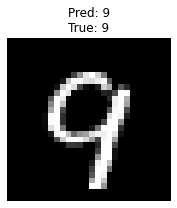

Hardware results.


In [134]:
process_next_sample()

In [ ]:
del a,b,c,d,e,f